# Proyecto 1: Sistemas NO-Transitivos, Algoritmos de Montecarlo y Simulacion de una variable aleatoria con Distribución Gamma



## 1.a
### Función Duelo(D1, D2)

Un dado no es más que una lista de números, de las cuales se elige una al azar. La función `Duelo` recibe como argumentos dos listas de números y determina cuántos resultados de los dados le dan la victoria al jugador del dado D1. El programa debe entregar como resultado:

- **1:** La mayoría de estos resultados los gana el jugador 1.
- **2:** La mayoría de estos resultados los gana el jugador 2.
- **0:** Si los dados están balanceados.

La función compara los resultados de lanzar los dados D1 y D2 para determinar quién gana más veces.


In [10]:
D1 = [3,3,3,3,3,3]
D2 = [2,2,2,6,6,6]


# Partimos creando la funcion pedida

def Duelo(D1, D2):
    
    # Creamos dos variables para contar las victorias de cada jugador
    victorias_jugador_1 = 0 
    victorias_jugador_2 = 0 
    
# Creamos dos bucles for para comparar los elementos de las dos listas
    for elem1 in D1:
        for elem2 in D2:
            # Si el elemento de la lista D1 es mayor que el de la lista D2, sumamos una victoria al jugador 1
            if elem1 > elem2:
                victorias_jugador_1 += 1

            # Si el elemento de la lista D2 es mayor que el de la lista D1, sumamos una victoria al jugador 2
            elif elem2 > elem1:
                victorias_jugador_2 += 1
            # Si los elementos son iguales, no sumamos ninguna victoria a ningun jugador

# Finalmente, comparamos las victorias de cada jugador

                
    if victorias_jugador_1 > victorias_jugador_2:
        return 1
    elif victorias_jugador_2 > victorias_jugador_1:
        return 2
    else:
        return 0



Duelo(D1, D2)


0

## 1.b 
### Escriba una función Notransitivo(D1,D2,D3)

La función `Notransitivo` recibe como argumentos tres listas de números (representando tres dados) y entrega como resultado:

- **1:** si los dados son no transitivos.
- **0:** si los dados no son no transitivos.

La función determina si los dados son no transitivos comparando las relaciones de ganar y perder entre ellos.


In [11]:
# Prueba con dados no-transitivos
D1 = [4, 4, 4, 4, 0, 0]
D2 = [3, 3, 3, 3, 3, 3]
D3 = [6, 6, 2, 2, 2, 2]


def Notransitivo(D1,D2,D3):
    
    
    #Para crear la funcion podemos usar la funcion anterior y comparar los resultados de los duelos
    #Si el resultado de la funcion Duelo es 1, significa que el jugador 1 gana al jugador 2,
    # Tambien se debe cumplir con que el jugador 2 gane al jugador 3 y que el jugador 3 gane al jugador 1 
    #Si se cumple esto, la funcion debe retornar True, de lo contrario False
    

    if Duelo(D1,D2) == 1 and Duelo(D2,D3) == 1 and Duelo(D3,D1) == 1 or Duelo(D1,D2) == 2 and Duelo(D2,D3) == 2 and Duelo(D3,D1) == 2:
        return True
    else:
        return False
    
Notransitivo(D1,D2,D3)


    

True

### La celda que viene a continuacion no es parte de la tarea, simplemente queria comprobar si la funcion duelo que habia creado funcionaba sin calcular la probabilidades. 

In [12]:
def DueloConProbabilidades(D1, D2):
    # Contadores de victorias
    victoriasD1 = 0
    victoriasD2 = 0
    empates = 0

    # Calcular las victorias
    for valor1 in D1:
        for valor2 in D2:
            if valor1 > valor2:
                victoriasD1 += 1
            elif valor1 < valor2:
                victoriasD2 += 1
            else:
                empates += 1

    # Total de comparaciones
    total_comparaciones = len(D1) * len(D2)

    # Calcular probabilidades
    probabilidad_D1_gana = victoriasD1 / total_comparaciones
    probabilidad_D2_gana = victoriasD2 / total_comparaciones
    probabilidad_empate = empates / total_comparaciones

    return probabilidad_D1_gana, probabilidad_D2_gana, probabilidad_empate

def NotransitivoConProbabilidades(D1, D2, D3):
    probabilidad_D1_gana_D2, probabilidad_D2_gana_D1, _ = DueloConProbabilidades(D1, D2)
    probabilidad_D2_gana_D3, probabilidad_D3_gana_D2, _ = DueloConProbabilidades(D2, D3)
    probabilidad_D3_gana_D1, probabilidad_D1_gana_D3, _ = DueloConProbabilidades(D3, D1)

    # Verificar no transitividad
    if probabilidad_D1_gana_D2 > 0.5 and probabilidad_D2_gana_D3 > 0.5 and probabilidad_D3_gana_D1 > 0.5:
        return True
    elif probabilidad_D2_gana_D1 > 0.5 and probabilidad_D3_gana_D2 > 0.5 and probabilidad_D1_gana_D3 > 0.5:
        return True
    else:
        return False

# Dados de Efron
Dado_A = [4, 4, 4, 4, 0, 0]
Dado_B = [3, 3, 3, 3, 3, 3]
Dado_C = [6, 6, 2, 2, 2, 2]

# Resultado de la no transitividad
resultado = NotransitivoConProbabilidades(Dado_A, Dado_B, Dado_C)
print("¿Es no transitivo?", resultado)



¿Es no transitivo? True


## 1.c 
### Función Damemisdados(m)

Dado que hay tres jugadores y solo nos interesa si un valor es más grande que otro, podemos hacer las siguientes simplificaciones sobre las listas que representan los dados:

- Son crecientes.
- Solo tienen etiquetas que van entre los valores 1 y 3m (donde recuerde, m son las caras).

Así, por ejemplo, si los dados tienen 6 caras, podemos pensar que las etiquetas van entre 1 y 18 (aunque un dado puede tener caras repetidas).

La función `Damemisdados` recibe el número de caras `m` y realiza las siguientes tareas:

- Itera sobre todas las posibles combinaciones de dados de `m` caras.
- Para cada combinación, aplica la función `Notransitivo` y muestra en pantalla la combinación si el resultado es 1.
- Además de imprimir en pantalla, todas las combinaciones deben ser guardadas en un archivo de texto.


In [13]:


import itertools

def generar_dados(m):
    valores = list(range(1, 3 * m + 1))
    return list(itertools.combinations_with_replacement(valores, m))

def Damemisdados(m):
    combinaciones = generar_dados(m)
    combinaciones_validas = []

    with open('combinaciones_validas.txt', 'w') as archivo:
        for D1 in combinaciones:
            for D2 in combinaciones:
                for D3 in combinaciones:
                    if Notransitivo(D1, D2, D3):
                        combinacion_str = f'{D1}, {D2}, {D3}'
                        print(combinacion_str)
                        archivo.write(combinacion_str + '\n')
                        combinaciones_validas.append((D1, D2, D3))

                    if len(combinaciones_validas) == 10:
                        break
    
    return combinaciones_validas

Damemisdados(3)

a = Damemisdados(3)

len(a)


(1, 3, 4), (2, 2, 5), (2, 3, 3)
(1, 3, 4), (2, 2, 6), (2, 3, 3)
(1, 3, 4), (2, 2, 7), (2, 3, 3)
(1, 3, 4), (2, 2, 8), (2, 3, 3)
(1, 3, 4), (2, 2, 9), (2, 3, 3)
(1, 3, 4), (2, 3, 3), (2, 2, 5)
(1, 3, 4), (2, 3, 3), (2, 2, 6)
(1, 3, 4), (2, 3, 3), (2, 2, 7)
(1, 3, 4), (2, 3, 3), (2, 2, 8)
(1, 3, 4), (2, 3, 3), (2, 2, 9)
(1, 3, 4), (2, 2, 5), (2, 3, 3)
(1, 3, 4), (2, 2, 6), (2, 3, 3)
(1, 3, 4), (2, 2, 7), (2, 3, 3)
(1, 3, 4), (2, 2, 8), (2, 3, 3)
(1, 3, 4), (2, 2, 9), (2, 3, 3)
(1, 3, 4), (2, 3, 3), (2, 2, 5)
(1, 3, 4), (2, 3, 3), (2, 2, 6)
(1, 3, 4), (2, 3, 3), (2, 2, 7)
(1, 3, 4), (2, 3, 3), (2, 2, 8)
(1, 3, 4), (2, 3, 3), (2, 2, 9)


10

* No pude con la combinatoria correcta... F 

## Pregunta 2



In [14]:

# Redefinimos la funcion duelo, ya que en la anterior nos arrojaba como resultado un entero no iterable. 
def Duelo2(dado1, dado2):
    victorias_dado1 = 0
    victorias_dado2 = 0
    empates = 0
    for cara_dado1 in dado1:
        for cara_dado2 in dado2:
            if cara_dado1 > cara_dado2:
                victorias_dado1 += 1
            elif cara_dado1 < cara_dado2:
                victorias_dado2 += 1
            else:
                empates += 1
    return victorias_dado1, victorias_dado2, empates


# Definimos los dados
dados = {
    'A': (3, 3, 3, 3, 3, 3),
    'B': (1, 1, 1, 5, 5, 5),
    'C': (2, 2, 2, 2, 6, 6),
    'D': (0, 0, 4, 4, 4, 4)
}

# Definimos los duelos
duelos = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

probabilidades = {}

# Calculamos las probabilidades de los duelos

def calcular_probabilidades_duelos(dados, duelos):
    probabilidades = {}
    for D1, D2 in duelos:
        victorias_dado1, victorias_dado2, empates = Duelo2(dados[D1], dados[D2])
        total_comparaciones = len(dados[D1]) * len(dados[D2])
        probabilidad_dado1 = victorias_dado1 / total_comparaciones
        probabilidad_dado2 = victorias_dado2 / total_comparaciones
        probabilidad_empate = empates / total_comparaciones
        probabilidades[(D1, D2)] = {
            D1: probabilidad_dado1,
            D2: probabilidad_dado2,
            'Empate': probabilidad_empate
        }
    return probabilidades

calcular_probabilidades_duelos(dados, duelos)




{('A', 'B'): {'A': 0.5, 'B': 0.5, 'Empate': 0.0},
 ('A', 'C'): {'A': 0.6666666666666666, 'C': 0.3333333333333333, 'Empate': 0.0},
 ('A', 'D'): {'A': 0.3333333333333333, 'D': 0.6666666666666666, 'Empate': 0.0},
 ('B', 'C'): {'B': 0.3333333333333333, 'C': 0.6666666666666666, 'Empate': 0.0},
 ('B', 'D'): {'B': 0.6666666666666666, 'D': 0.3333333333333333, 'Empate': 0.0},
 ('C', 'D'): {'C': 0.5555555555555556, 'D': 0.4444444444444444, 'Empate': 0.0}}

In [15]:
# Debido a que ahora las reglas del juego cambiaron, los dados no seran los mismos que en el ejercicio anterior
# Definimos los nuevos dados, lo cuales corresponden a todas las combinaciones de la suma de dos lanzamientos 
def sumas_de_dos_lanzamientos(dado):
    sumas = []
    for x in dado:
        for y in dado:
            sumas.append(x + y)
    return sumas

# Dados de Efron
dados = {
    'A': (3, 3, 3, 3, 3, 3),
    'B': (1, 1, 1, 5, 5, 5),
    'C': (2, 2, 2, 2, 6, 6),
    'D': (0, 0, 4, 4, 4, 4)
}


def generar_sumas_para_todos_los_dados(dados):
    sumas_dados = {}
    for nombre_dado, valores in dados.items():
        sumas_dados[nombre_dado] = sumas_de_dos_lanzamientos(valores)
    return sumas_dados

# Guardamos la funciono en una variable para despues probar si esta funciona como queremos. 
sumas_dados = generar_sumas_para_todos_los_dados(dados)

#Probamos si el programa funciona

for nombre_dado, sumas in sumas_dados.items():
    # Imprimimos las sumas de dos lanzamientos para cada dado
    print(f"Todas las posibles sumas de dos lanzamientos para el dado {nombre_dado}: {sumas}")
    # Imprimimos la longitud de la lista de sumas para cada dado, si son iguales entonces estamos bien :) 
    print(f"Longitud de la lista de sumas para el dado {nombre_dado}: {len(sumas)}")


# Ahora con los nuevos dados, podemos entregarle esta variable "sumas_dados" a la funcion anterior, la cual ya nos calculaba las probabilidades 

calcular_probabilidades_duelos(sumas_dados, duelos)



Todas las posibles sumas de dos lanzamientos para el dado A: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Longitud de la lista de sumas para el dado A: 36
Todas las posibles sumas de dos lanzamientos para el dado B: [2, 2, 2, 6, 6, 6, 2, 2, 2, 6, 6, 6, 2, 2, 2, 6, 6, 6, 6, 6, 6, 10, 10, 10, 6, 6, 6, 10, 10, 10, 6, 6, 6, 10, 10, 10]
Longitud de la lista de sumas para el dado B: 36
Todas las posibles sumas de dos lanzamientos para el dado C: [4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 12, 12, 8, 8, 8, 8, 12, 12]
Longitud de la lista de sumas para el dado C: 36
Todas las posibles sumas de dos lanzamientos para el dado D: [0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 4, 4, 8, 8, 8, 8, 4, 4, 8, 8, 8, 8, 4, 4, 8, 8, 8, 8]
Longitud de la lista de sumas para el dado D: 36


{('A', 'B'): {'A': 0.25, 'B': 0.25, 'Empate': 0.5},
 ('A', 'C'): {'A': 0.4444444444444444, 'C': 0.5555555555555556, 'Empate': 0.0},
 ('A', 'D'): {'A': 0.5555555555555556, 'D': 0.4444444444444444, 'Empate': 0.0},
 ('B', 'C'): {'B': 0.4444444444444444, 'C': 0.5555555555555556, 'Empate': 0.0},
 ('B', 'D'): {'B': 0.5555555555555556, 'D': 0.4444444444444444, 'Empate': 0.0},
 ('C', 'D'): {'C': 0.4074074074074074,
  'D': 0.19753086419753085,
  'Empate': 0.3950617283950617}}

* Se puede apreciar que los dados siguen siendo No-transitivos 

In [16]:
# Ahora nos estan preguntando por el maximo de dos lanzamientos, es por esto que tenemos que modificar la funcion sumas_de_dos_lanzamientos 

def maximo_de_dos_lanzamientos(dado):
    maximos = []
    for x in dado:
        for y in dado:
            maximos.append(max(x, y))
    return maximos

# Dados de Efron

dados = {
    'A': (3, 3, 3, 3, 3, 3),
    'B': (1, 1, 1, 5, 5, 5),
    'C': (2, 2, 2, 2, 6, 6),
    'D': (0, 0, 4, 4, 4, 4)
}

# Función que genera los valores máximos de dos lanzamientos para todos los dados en el diccionario
def generar_maximos_para_todos_los_dados(dados):
    maximos_dados = {}
    for nombre_dado, valores in dados.items():
        maximos_dados[nombre_dado] = maximo_de_dos_lanzamientos(valores)
    return maximos_dados

# Obtener todos los posibles valores máximos de dos lanzamientos para cada dado
maximos_dados = generar_maximos_para_todos_los_dados(dados)

# Imprimir los resultados y la longitud de cada lista
for nombre_dado, maximos in maximos_dados.items():
    print(f"Todos los posibles valores máximos de dos lanzamientos para el dado {nombre_dado}: {maximos}")
    print(f"Longitud de la lista de valores máximos para el dado {nombre_dado}: {len(maximos)}")

# Ahora con los nuevos dados, podemos entregarle esta variable "maximos_dados" a la funcion anterior, la cual ya nos calculaba las probabilidades

calcular_probabilidades_duelos(maximos_dados, duelos)

Todos los posibles valores máximos de dos lanzamientos para el dado A: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Longitud de la lista de valores máximos para el dado A: 36
Todos los posibles valores máximos de dos lanzamientos para el dado B: [1, 1, 1, 5, 5, 5, 1, 1, 1, 5, 5, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Longitud de la lista de valores máximos para el dado B: 36
Todos los posibles valores máximos de dos lanzamientos para el dado C: [2, 2, 2, 2, 6, 6, 2, 2, 2, 2, 6, 6, 2, 2, 2, 2, 6, 6, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Longitud de la lista de valores máximos para el dado C: 36
Todos los posibles valores máximos de dos lanzamientos para el dado D: [0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Longitud de la lista de valores máximos para el dado D: 36


{('A', 'B'): {'A': 0.25, 'B': 0.75, 'Empate': 0.0},
 ('A', 'C'): {'A': 0.4444444444444444, 'C': 0.5555555555555556, 'Empate': 0.0},
 ('A', 'D'): {'A': 0.1111111111111111, 'D': 0.8888888888888888, 'Empate': 0.0},
 ('B', 'C'): {'B': 0.3333333333333333, 'C': 0.6666666666666666, 'Empate': 0.0},
 ('B', 'D'): {'B': 0.7777777777777778, 'D': 0.2222222222222222, 'Empate': 0.0},
 ('C', 'D'): {'C': 0.6049382716049383, 'D': 0.3950617283950617, 'Empate': 0.0}}

Escriba una función Dameunalista(m) que reciba como argumentos la cantidad m de
lados que queremos que tenga un dado, y debe entregar una lista aleatoria de m valores
entre 1 y 3m

In [17]:
import random as rd 
# Definimos una funcion que nos retorne valores entre 1 y 3*m, asumiendo que estos son enteros. 
def Dameunalista(m):
    return [rd.randint(1, 3 * m) for _ in range(m)]



lista = Dameunalista(6)
print(len(lista))


Dameunalista(20) 








6


[2, 5, 5, 31, 14, 40, 31, 36, 44, 20, 16, 46, 24, 43, 40, 45, 35, 56, 18, 20]

In [18]:
def Montecarlonotransitivo(m, r):
    no_transitivo = 0
    Dados_no_transitivos = []
    
    for _ in range(r):
        D1 = Dameunalista(m)
        D2 = Dameunalista(m)
        D3 = Dameunalista(m)
        
        if Notransitivo(D1, D2, D3):
            Dados_no_transitivos.append((D1, D2, D3))

            no_transitivo += 1

    
    return Dados_no_transitivos,no_transitivo / r

fraccion_no_transitiva = Montecarlonotransitivo(6, 100000)

fraccion_no_transitiva


([([18, 2, 17, 17, 13, 3], [6, 9, 6, 18, 18, 10], [9, 14, 18, 4, 12, 11]),
  ([18, 3, 10, 18, 7, 7], [14, 11, 12, 2, 16, 2], [5, 11, 11, 18, 11, 4]),
  ([10, 2, 11, 15, 5, 13], [9, 15, 7, 16, 3, 6], [12, 7, 9, 18, 7, 5]),
  ([3, 4, 2, 3, 18, 18], [9, 12, 1, 11, 2, 15], [4, 8, 5, 8, 4, 11]),
  ([17, 2, 15, 10, 1, 12], [12, 9, 6, 10, 6, 17], [4, 16, 1, 18, 16, 2]),
  ([15, 4, 6, 13, 5, 15], [8, 14, 8, 12, 5, 14], [3, 12, 18, 1, 15, 9]),
  ([4, 5, 5, 13, 16, 18], [11, 10, 7, 7, 14, 8], [14, 3, 12, 3, 16, 16]),
  ([4, 11, 16, 5, 17, 15], [16, 9, 16, 2, 15, 13], [14, 15, 17, 8, 11, 6]),
  ([3, 5, 8, 9, 11, 5], [13, 1, 1, 4, 17, 15], [18, 8, 3, 7, 2, 9]),
  ([10, 2, 16, 6, 18, 5], [5, 12, 11, 17, 11, 3], [12, 13, 1, 18, 4, 7]),
  ([2, 7, 13, 10, 3, 15], [5, 7, 4, 8, 12, 12], [16, 18, 5, 3, 3, 3]),
  ([5, 15, 14, 12, 14, 10], [10, 16, 9, 12, 8, 3], [16, 2, 7, 2, 18, 15]),
  ([11, 11, 1, 5, 10, 11], [1, 13, 2, 13, 13, 5], [1, 17, 5, 6, 2, 14]),
  ([14, 3, 13, 4, 16, 3], [16, 13, 12, 3, 13, 2],

In [21]:


fraccion_no_transitiva = Montecarlonotransitivo(100, 100000)

# Muestra solo los primeros 5 resultados de Dados_no_transitivos
primeros_resultados = fraccion_no_transitiva[0][:5]
print(primeros_resultados)



[([291, 35, 300, 174, 226, 18, 114, 280, 54, 213, 143, 193, 230, 300, 100, 57, 87, 59, 277, 299, 45, 265, 290, 184, 7, 157, 199, 226, 19, 241, 114, 284, 211, 144, 154, 7, 198, 114, 147, 23, 36, 51, 142, 118, 263, 172, 297, 244, 221, 103, 88, 205, 15, 207, 186, 203, 6, 290, 48, 219, 220, 174, 264, 148, 176, 28, 10, 252, 294, 15, 276, 211, 283, 206, 106, 270, 134, 180, 64, 13, 266, 108, 71, 255, 237, 225, 9, 232, 173, 84, 53, 199, 278, 1, 174, 102, 197, 15, 289, 19], [106, 152, 147, 50, 140, 178, 115, 268, 228, 234, 26, 167, 14, 279, 231, 71, 40, 45, 39, 282, 101, 1, 129, 59, 259, 221, 173, 226, 296, 138, 262, 206, 181, 251, 109, 299, 221, 123, 72, 155, 252, 4, 59, 128, 97, 265, 193, 35, 232, 108, 210, 276, 126, 113, 43, 190, 68, 249, 246, 205, 9, 295, 146, 109, 248, 244, 110, 281, 225, 241, 259, 195, 227, 121, 92, 158, 20, 246, 52, 6, 256, 239, 251, 12, 51, 269, 198, 234, 251, 253, 153, 134, 59, 21, 132, 67, 87, 268, 262, 151], [160, 137, 104, 254, 179, 16, 121, 264, 188, 206, 200, 207,

In [ ]:
Montecarlonotransitivo(1000,1000000) 

## Pregunta 3 



### 3.1 

Se graficará la función  alpha * Gamma (alpha) ; con alpha [0,1]

In [ ]:
import numpy as np

def gamma_func(alpha):
    if alpha <= 0:
        return np.inf  # La función gamma no está definida para valores no positivos
    elif alpha == 1:
        return 1  # Gamma(1) es igual a 1
    else:
        # Aproximación de la integral usando sumas de Riemann
        n = 10000  # Número de subdivisiones
        dx = 1.0 / n
        integral = 0
        for i in range(1, n+1):
            x = (i - 0.5) * dx
            integral += x**(alpha - 1) * np.exp(-x) * dx
        return integral

# Definimos un rango de valores para alpha entre 0 y 1
alphas = np.linspace(0.01, 1, 100)

# Calculamos alpha * gamma(alpha) para cada valor de alpha
resultados = np.array([alpha * gamma_func(alpha) for alpha in alphas])

# Encontramos los valores que toma alpha * gamma(alpha) cuando alpha está entre 0 y 1
valores = np.unique(resultados)

print("Valores de alpha * Gamma(alpha) cuando alpha está entre 0 y 1:")
for valor in valores:
    print(valor)




Valores de alpha * Gamma(alpha) cuando alpha está entre 0 y 1:
0.09789577744364776
0.18486975385380336
0.2620718665490139
0.3305327320923979
0.3911759341275636
0.4448290528603554
0.4922335644431846
0.53405372550043
0.5708845463319151
0.6032589458133621
0.6316541715590862
0.6337744778632664
0.6354475507157342
0.6371400847034469
0.6388523923821281
0.6405847911975192
0.6423376033711823
0.6441111557528046
0.645905779634278
0.6477218105200522
0.6495595878479155
0.6514194546532757
0.6533017571693346
0.655206844354611
0.6564975604159293
0.6571350673380223
0.6590867787708249
0.6610623320730669
0.6630620805609118
0.6650863764394161
0.6671355696435259
0.6692100065077844
0.6713100282431156
0.6734359691962524
0.6755881548643484
0.6777668996341967
0.6781717067211745
0.6799725042116445
0.6822052527026026
0.6844654093025301
0.6867532145459826
0.6890688810621012
0.6914125887753135
0.6937844794833394
0.696184650736531
0.6970190988949925
0.6986131489334065
0.7010699615371363
0.7035550083065443
0.7060681

C:\Users\Benja\AppData\Local\Temp\ipykernel_5572\4240446628.py:33: RuntimeWarning: divide by zero encountered in power
  y = x ** (alpha - 1) * np.exp(-x) / (math.gamma(alpha))


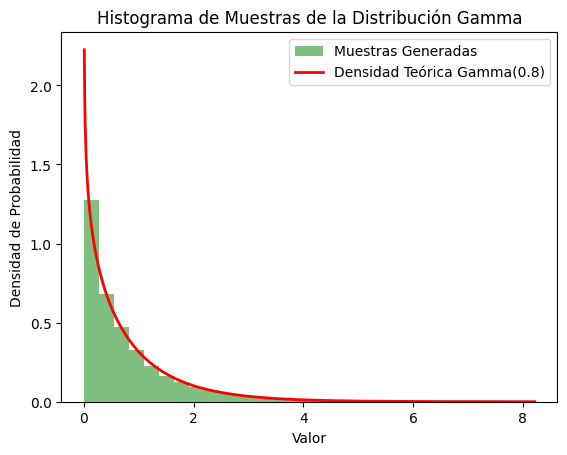

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def GammaChico(alpha):
    while True:
        # Paso 1: Generar una muestra Y de la distribución Generalizada Exponencial
        Y = -np.log(1 - np.random.uniform(0, 1) ** (1 / alpha))
        
        # Paso 2: Generar una muestra U uniforme en [0, 1]
        U = np.random.uniform(0, 1)
        
        # Paso 3: Calcular la constante r
        r = 1 / (alpha * math.gamma(alpha))
        
        # Paso 4: Calcular la razón de las densidades
        ratio = Y ** (alpha - 1) / (alpha * math.gamma(alpha) * (1 - np.exp(-Y)) ** (alpha - 1))
        
        # Paso 5: Aceptar o rechazar la muestra
        if U <= ratio / r:
            return Y

# Definimos el parametro alpha de la distribución Gamma
alpha = 0.8

# Generamos 1000 muestras 
samples = [GammaChico(alpha) for _ in range(10000)]

# Graficamos un histograma de las muestras, ya que he visto varios papers que trabajan con histogramas jeje. 
plt.hist(samples, bins=30, density=True, alpha=0.5, color='g', label='Muestras Generadas')

# Graficamos la densidad teórica de la distribución Gamma
x = np.linspace(0, np.max(samples), 1000)
y = x ** (alpha - 1) * np.exp(-x) / (math.gamma(alpha))
plt.plot(x, y, 'r-', lw=2, label=f'Densidad Teórica Gamma({alpha})')

plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title('Histograma de Muestras de la Distribución Gamma')
plt.legend()
plt.show()


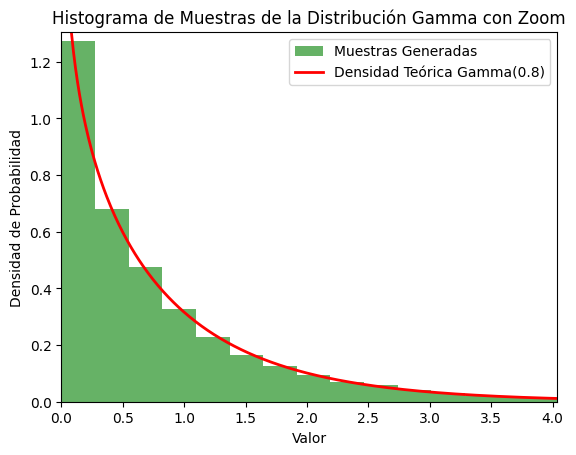

In [ ]:

# Grafico un histograma de las muestras con zoom
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Muestras Generadas')

# Grafico la densidad teórica de la distribución Gamma con zoom
plt.plot(x, y, 'r-', lw=2, label=f'Densidad Teórica Gamma({alpha})')

plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title('Histograma de Muestras de la Distribución Gamma con Zoom')
plt.legend()

#Ajustl el rango de los ejes para un mejor zoom
plt.xlim(0, np.percentile(samples, 99))  # Fijar el límite x hasta el percentil 99 de las muestras
plt.ylim(0, np.percentile(y, 99))       # Fijar el límite y hasta el percentil 99 de la densidad teórica

plt.show()


### 3.3 

In [ ]:
import numpy as np

def simular_exponencial_uniforme():
    u = np.random.rand()  # Genera una variable uniforme en [0, 1]
    return -np.log(1 - u)  # Devuelve una variable exponencial

def GammaEntero(alpha):
    # Paso 1: Generar α variables uniformes, check 
    # Paso 2: Aplicar la función inversa de la exponencial, check 
    variables_exponenciales = [simular_exponencial_uniforme() for _ in range(alpha)]
    
    # Paso 3: Sumar las variables exponenciales
    suma_exp = sum(variables_exponenciales)
    
    # Paso 4: Devolver el resultado
    return suma_exp

# Simulamos valores de la variable Gamma con α = 5
num_valores = 1000  
alpha = 5  
resultados = [GammaEntero(alpha) for _ in range(num_valores)]

print("Valores de la variable Gamma simulados con alpha =", alpha, ":")
print(resultados)





Valores de la variable Gamma simulados con alpha = 5 :
[7.768689231436726, 7.565381764991116, 3.486761906470167, 2.7307644930490893, 5.547044855902977, 4.584229064186688, 5.142849177239036, 7.767816112139889, 12.930213561682754, 2.4390979869694474, 6.274663068129508, 16.39646556266227, 2.4223278049914767, 4.862723003385707, 3.859549066094079, 0.902600916013445, 15.214188921673319, 3.4410478597621146, 5.414118250541479, 4.858097137515211, 3.554683193835508, 3.033539345675189, 3.9021803525586116, 8.349841460593693, 2.119266122036039, 2.3901322285431528, 3.92790206592091, 5.174918635588511, 3.025568483267857, 4.9040010984738736, 3.142650461952043, 6.937183039351271, 4.2205566426413474, 5.2957188306541845, 5.311829793578054, 3.59536755519421, 9.178832026594048, 5.377678856125139, 6.296708368323711, 1.3516317766956962, 2.2983694885458603, 8.227437703480655, 2.8424959660719753, 3.1876596217762976, 10.32301798084682, 1.937081985148143, 2.251059556951641, 2.2910241388667467, 4.0911229373379445

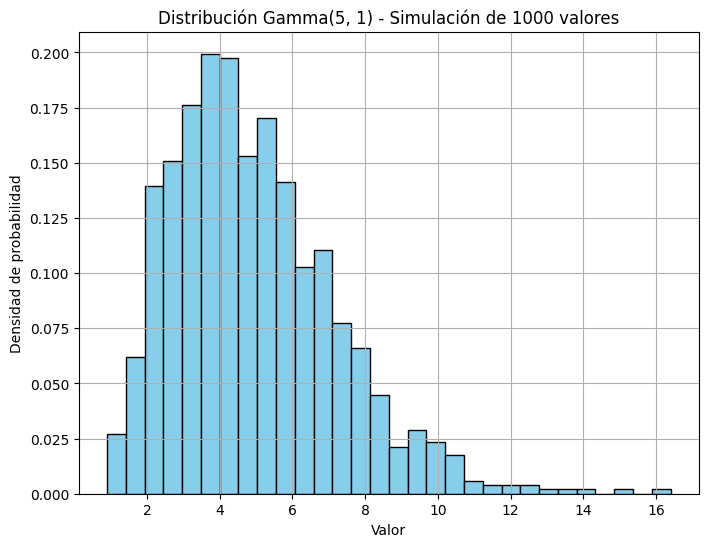

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(resultados, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title(f'Distribución Gamma({alpha}, 1) - Simulación de {num_valores} valores')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()

### 3.4 

In [ ]:
# Defino la función GammaReal
def GammaReal(alpha):

    # Separo la parte entera y decimal de alpha
    alpha_entero = int(alpha)  
    alpha_decimal = alpha - alpha_entero  # Para que siempre sea positivo y menor a 1
    
    muestra_entero = GammaEntero(alpha_entero)  # Simular una muestra de Gamma con parámetro alpha_entero
    muestra_decimal = GammaChico(alpha_decimal)  # Simular una muestra de Gamma con parámetro alpha_decimal
    
    suma_muestras = muestra_entero + muestra_decimal  # Sumar las muestras obtenidas
    
    return suma_muestras  # Devolver la suma de las muestras


alpha = 9.25 
num_muestras = 1000  

# Tomo muchas muestras de la distribución Gamma usando GammaReal
resultados = [GammaReal(alpha) for _ in range(num_muestras)]

# Imprimo los resultados
print("Valores de la variable Gamma simulados con alpha =", alpha, "y", num_muestras, "muestras:")
print(resultados)


Valores de la variable Gamma simulados con alpha = 9.25 y 1000 muestras:
[7.5128451880869465, 8.407775034281185, 8.448153172096605, 8.367316474410247, 10.577678203290017, 11.853754367375545, 11.675364565519688, 8.66900870323962, 7.73019454491898, 13.402913970408472, 6.919411489218286, 6.801109481399829, 9.332583483651543, 15.495806601112525, 12.200137658827053, 7.416514686210951, 11.581211208364522, 6.335049383785523, 12.933290049515906, 11.301752642173021, 15.222847887578094, 8.964040512970634, 8.244843138697666, 6.402137482052753, 10.224199279974867, 7.000333193579142, 12.933013495468424, 10.120288409825902, 10.251413295395121, 6.852095284542764, 4.133751900956308, 4.886627995493994, 8.41088259395813, 5.357720226751799, 10.44308021603207, 7.958070328913235, 10.32171795241094, 8.89529191119662, 5.1460970103237145, 10.40140089395497, 6.886461811968135, 6.568250823564922, 15.111871435796479, 9.439816755200724, 13.190004936410311, 10.284513264101596, 9.002719371372812, 11.694384894915158

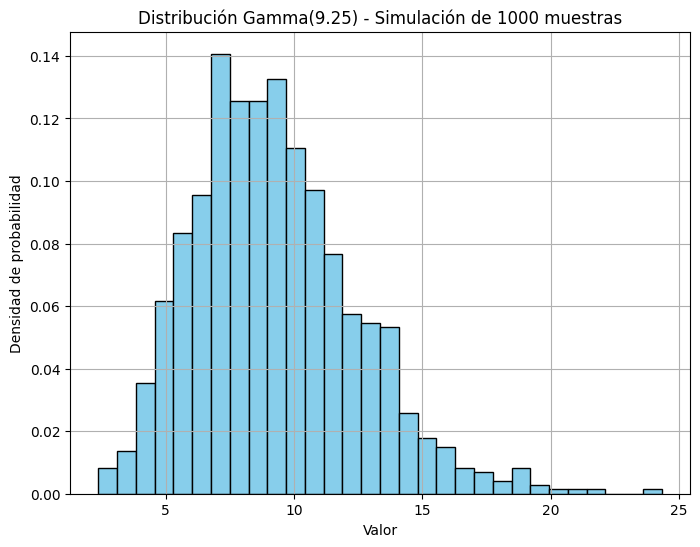

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(resultados, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title(f'Distribución Gamma({alpha}) - Simulación de {num_muestras} muestras')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()

## AUTOR: 

### Benjamín Campos